<div style="line-height:0.5">
<h1 style="color:#D68910"> Scipy basics 1 </h1>
<h4> 5 Examples using the same custom Perceptron class. Focus on Combinatorial Calculation and Linear Algebra. </h4>
</div>
<div style="margin-top: -10px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3>  interpolation + odeint + optimize.minimize + eigh
</span>
</div>

In [140]:
import numpy as np

from scipy import log
from scipy import polyfit
from scipy import cumsum
from scipy import poly1d
from scipy.fft import fft, dct
from scipy.integrate import quad, odeint
from scipy.stats import linregress, norm
from scipy.interpolate import splrep, splev, interp1d, RectBivariateSpline
from scipy.special import exp10, exp2, sindg, factorial, comb, jn, perm, binom, logit, expit
from scipy.linalg import solve, eig, inv, eigh, det
from scipy.optimize import fsolve, root, minimize_scalar, minimize, curve_fit, rosen

import matplotlib.pyplot as plt

from scipy.stats import norm, uniform, expon, binom, poisson

<h2 style="color:#D68910"> Math: </h2>

In [96]:
%%script echo Skipping: DeprecationWarning, better use numpy for simply math
from scipy import add, subtract, multiply, divide
su = add(5, 3)
di = subtract(10, 4)
pr = multiply(5,3)
qu = divide(81,9)

su, di, pr, qu

Skipping: DeprecationWarning, better use numpy for simply math


In [104]:
a = exp10(2)
b = exp2(4)
c = sindg(90)
#d = log(10)  # deprecated => use numpy

a, b, c

(100.0, 16.0, 1.0)

In [102]:
""" Logit + Sigmoid 
Logit Function (inverse of sigmoid): maps a probability in the range (0, 1) back to the whole real number line.
""" 
x = 0.7

logit_result = logit(x)  # Calculate the logit function
expit_result = expit(x)  

print("Logit:", logit_result)
print("Expit:", expit_result)

Logit: 0.8472978603872034
Expit: 0.6681877721681662


In [105]:
""" Factorial """
n = 5
result = factorial(n)
result

120.0

<h2 style="color:#D68910"> Plots: </h2>

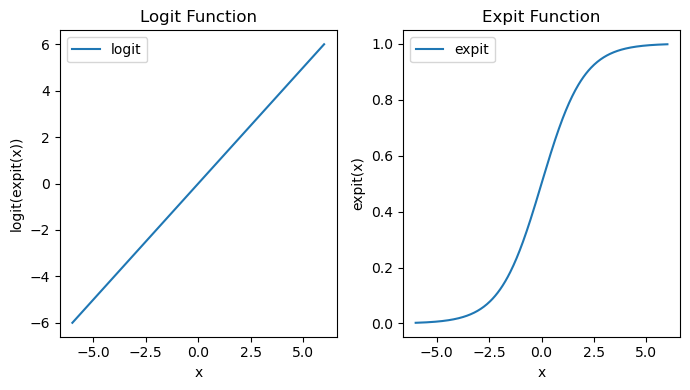

In [108]:
# Generate x values
x = np.linspace(-6, 6, 400)

# Calculate logit and expit values for each x
logit_values = logit(expit(x))
expit_values = expit(x)

# Create a figure and axis
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)  # Subplot for logit
plt.plot(x, logit_values, label='logit')
plt.title('Logit Function')
plt.xlabel('x')
plt.ylabel('logit(expit(x))')
plt.legend()

plt.subplot(1, 2, 2)  # Subplot for expit
plt.plot(x, expit_values, label='expit')
plt.title('Expit Function')
plt.xlabel('x')
plt.ylabel('expit(x)')
plt.legend()

plt.tight_layout()
plt.show()

In [117]:
%%script echo Skipping: deprecated! Use numpy.floor and numpy.round

floor_result = scipy.floor(4.9)
rounded_result = scipy.round(3.7)

Skipping: deprecated! Use numpy.floor and numpy.round


In [112]:
min_value = scipy.minimum(5, 8)
max_value = scipy.maximum(3, 12)


/tmp/ipykernel_1761836/677269338.py:1: DeprecationWarning: scipy.minimum is deprecated and will be removed in SciPy 2.0.0, use numpy.minimum instead
  min_value = scipy.minimum(5, 8)
/tmp/ipykernel_1761836/677269338.py:2: DeprecationWarning: scipy.maximum is deprecated and will be removed in SciPy 2.0.0, use numpy.maximum instead
  max_value = scipy.maximum(3, 12)


<h2 style="color:#D68910"> Combinatorial calc: </h2>

In [5]:
""" The binomial coefficient => comb(n, k) = n! / (k! * (n-k)!) """
# Total number of items
n = 10
# Number of items being chosen
k = 3
res_Comb = comb(n, k)
res_Comb

120.0

In [79]:
n = 5  #total number of items
k = 3  #num of items to arrange
permutations = perm(n, k)
print(permutations)

60.0


In [80]:
n = 5
k = 2
binomial_coefficient = binom(n, k)
print(binomial_coefficient)

10.0


In [4]:
""" Fit a polynomial of a specified degree to a set of data points (x,y) 
Use numpy since scipy.polyfit is deprecated !
"""
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 7, 12, 20])

#coefficients = polyfit(x, y, 2)    
coefficients = np.polyfit(x, y, 2)
print(coefficients)

[ 1.07142857 -1.92857143  2.8       ]


slope 4.5
intercept -4.699999999999999


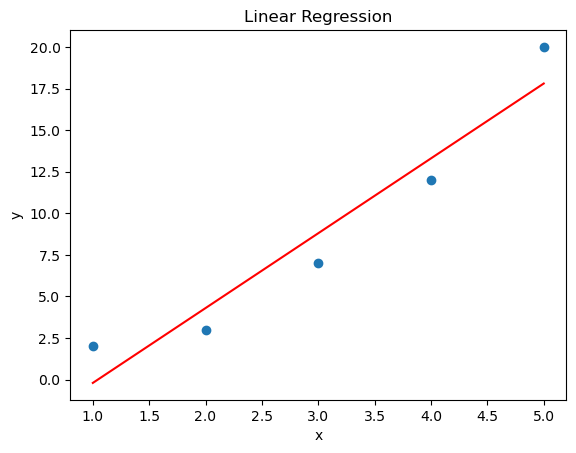

In [8]:
""" Calculate slope and intercept """
x = [1, 2, 3, 4, 5]
y = [2, 3, 7, 12, 20]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print("slope", slope)
print("intercept", intercept)

plt.scatter(x, y)
# Convert x to array 
x = np.array(x)

# Predict y values using fitted line 
pred_y = slope*x + intercept

# Plot the fitted line
plt.plot(x, pred_y, color='red') 
plt.title('Linear Regression')
plt.xlabel('x')  
plt.ylabel('y')
plt.show()

In [10]:
""" Solve a linear system of equations, finding the vector x that satisfies: A * x = b 
A: The coefficient matrix, shape (N, N)
b: The right hand side vector, shape (N) 
"""
A = np.array([[2, 3], [4, 1]])
b = np.array([8, 7])

x = solve(A, b)
x

array([1.3, 1.8])

In [27]:
""" Solving a linear algebra system which can be given as   
        x + 3y +10z = 10  
        2x + 12y + 7z = 18  
        5x + 8y + 8z = 30  
"""
# Input array  
a = np.array([[1, 3, 10], [2, 12, 7], [5, 8, 8]])  
# Solution Array  
b = np.array([[10], [18], [30]])  

x = solve(a, b)  
# Print results  
print(x)  
# Checking Results  
print("\n Checking results")  
print(a.dot(x) - b)  

[[4.55393586]
 [0.51311953]
 [0.39067055]]

 Checking results
[[ 0.00000000e+00]
 [-3.55271368e-15]
 [ 0.00000000e+00]]


<h2 style="color:#D68910"> Linear Algebra: </h2>

In [32]:
""" Find the determinant """
A = np.array([[5,9],[8,4]])  

B = np.array([[1, 2, 3], 
            [4, 5, 6],
            [7, 8, 9]])

det_A = det(A)  
det_B = det(B)

det_A, det_B

(-52.0, 0.0)

eigenvalues [3.61803399+0.j 1.38196601+0.j]
eigenvectors [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


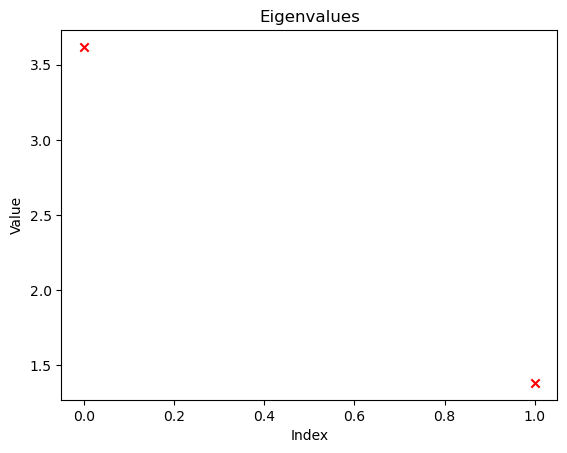

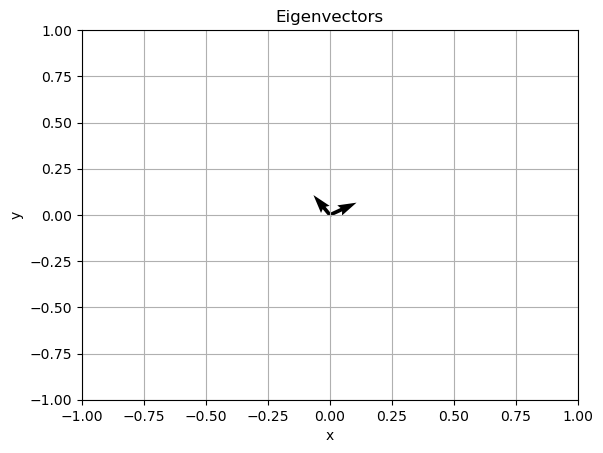

In [11]:
""" Find eigenvalues and eigenvectors 
The eig function computes the eigenvalues and right eigenvectors of a general square matrix.

ComplexWarning, due to: Some of the values in the eigenvector array have imaginary components, that are being casted as real numbers, dropping the imaginary part.
"""
A = np.array([[3, 1], [1, 2]])

eigenvalues, eigenvectors = eig(A)
print(f"eigenvalues {eigenvalues}")
print(f"eigenvectors {eigenvectors}")


# Plot the eigenvalues
plt.scatter(range(len(eigenvalues)), eigenvalues, color='r', marker='x')
plt.title('Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# Plot the eigenvectors
plt.quiver(*[[0,0], [0,0]], *eigenvectors, angles='xy', scale_units='xy')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Eigenvectors')
plt.grid()
plt.show()

In [122]:
A = np.array([[1, 2, 3, 4], [4, 3, 2, 1], [1, 4, 6, 3], [2, 3, 2, 5]])
# Convert the array to a formatted string
formatted_array = '\n'.join(['  '.join([f'{val:4d}' for val in row]) for row in A])
print(formatted_array)

   1     2     3     4
   4     3     2     1
   1     4     6     3
   2     3     2     5


<h3 style="color:#D68910"> => eigenvalues </h3>

Matrix:
   1     2     3     4
   4     3     2     1
   1     4     6     3
   2     3     2     5
Selected eigenvalues : [-2.53382695  1.66735639  3.69488657 12.17158399]
Complex ndarray : [[ 0.69205614  0.5829305   0.25682823 -0.33954321]
 [-0.68277875  0.46838936  0.03700454 -0.5595134 ]
 [ 0.23275694 -0.29164622 -0.72710245 -0.57627139]
 [ 0.02637572 -0.59644441  0.63560361 -0.48945525]]


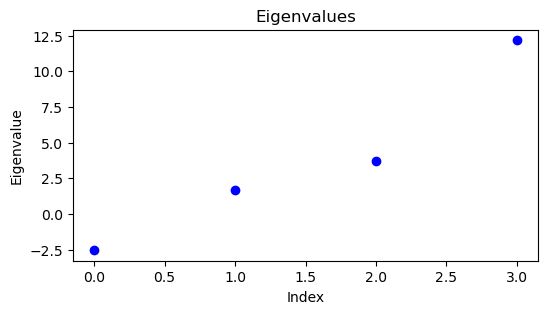

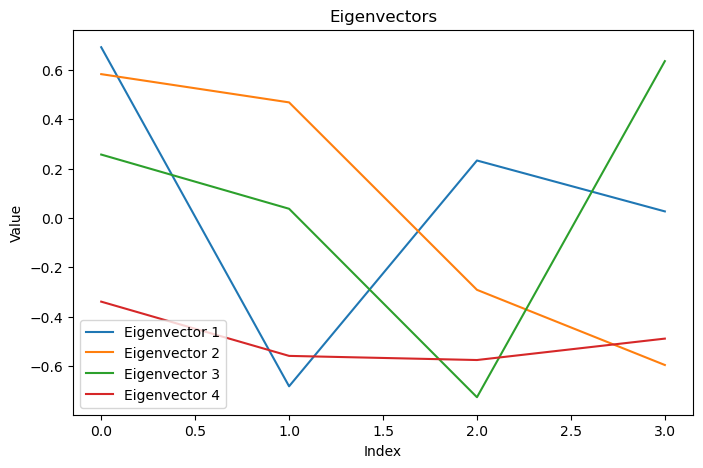

In [124]:
""" The eigh function is specifically designed for symmetric or Hermitian matrices (real symmetric or complex Hermitian). 
The eigenvalues are guaranteed to be real, and the eigenvectors are orthogonal.
"""
A = np.array([[1, 2, 3, 4], [4, 3, 2, 1], [1, 4, 6, 3], [2, 3, 2, 5]])

# Convert the array to a formatted string
formatted_array = '\n'.join(['  '.join([f'{val:4d}' for val in row]) for row in A])
print("Matrix:")
print(formatted_array)

eigenvalues, eigenvectors = eigh(A)
print("Selected eigenvalues :", eigenvalues)
print("Complex ndarray :", eigenvectors)

# Plot eigenvalues
plt.figure(figsize=(6, 3))
plt.scatter(np.arange(len(eigenvalues)), eigenvalues, color='blue')
plt.title("Eigenvalues")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.show()

# Plot eigenvectors
plt.figure(figsize=(8, 5))
for i in range(len(eigenvalues)):
    plt.plot(np.arange(len(eigenvectors)), eigenvectors[:, i], label=f"Eigenvector {i+1}")
plt.title("Eigenvectors")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


In [13]:
""" Get the inverse of a matrix """
B = np.array([[1, 2], [3, 4]])
inverse_B = inv(B)
inverse_B

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [14]:
""" Calculate the Bessel's differential equation of the first kind (of order n at a value x). """ 
# The order of the Bessel function. This must be an integer
n = 2
# The value to evaluate the Bessel function at
x = 1.5

bessel_value = jn(n, x)
bessel_value

0.23208767214421475

### Functions:

In [116]:
%%script echo Skipping: deprecated! Use numpy.sinh and numpy.cosh

hyperbolic_sin_result = scipy.sinh(1.5)  # hyperbolic sine
hyperbolic_cos_result = scipy.cosh(2.0)  # hyperbolic cosine

Skipping: deprecated! Use numpy.sinh and numpy.cosh


In [35]:
""" Find the minimum of a function f(x) using the Nelder-Mead method. """
def f(x):     
    return .2*(1 - x[0])**2  

minimize(f, [2, -1], method="Nelder-Mead")  

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.0
             x: [ 1.000e+00 -1.271e+00]
           nit: 69
          nfev: 147
 final_simplex: (array([[ 1.000e+00, -1.271e+00],
                       [ 1.000e+00, -1.271e+00],
                       [ 1.000e+00, -1.271e+00]]), array([ 0.000e+00,  0.000e+00,  0.000e+00]))

#### Other available optimization methods that can be used with scipy.optimize.minimize

- 'BFGS' - Broyden–Fletcher–Goldfarb–Shanno algorithm. A quasi-Newton method that approximates the Hessian matrix. Typically faster than Nelder-Mead.                 
- 'CG' - Conjugate gradient method. Uses gradient information to minimize quadratic objective functions.                 
- 'Powell' - Powell's method. A conjugate direction method that does not require derivatives.                 
- 'COBYLA' - Constrained optimization by linear approximation. For optimization with constraints.                 
- 'SLSQP' - Sequential Least Squares Programming. Uses equality and inequality constraints.                 
- 'trust-constr' - Trust-region constrained algorithm. Can handle bounds and linear and nonlinear constraints.                 
- 'dogleg' - Dogleg algorithm. Powell's dogleg method combined with gradient information.                 
- 'trust-ncg' - Trust Newton-CG method. Uses Hessian information and handles bounds well.                 

In [40]:
def f(x):
    return x[0]**2 + x[1]**2

res_bfgs = minimize(f, [10, 5], method='BFGS')
res_bfgs

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.2624892992422268e-13
        x: [ 2.629e-07 -3.964e-07]
      nit: 2
      jac: [ 5.408e-07 -7.778e-07]
 hess_inv: [[ 6.000e-01 -2.000e-01]
            [-2.000e-01  9.000e-01]]
     nfev: 12
     njev: 4

In [42]:
def f(x):
    return (x[0] - 3)**2 + (x[1] - 2)**2

res_cg = minimize(f, [0, 0], method='CG')
res_cg

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 7.394475662660855e-13
       x: [ 3.000e+00  2.000e+00]
     nit: 1
     jac: [ 1.446e-06  9.689e-07]
    nfev: 9
    njev: 3

In [43]:
def f(x):
    return x[0]**2 + abs(x[1])

cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2})  

res_cobyla = minimize(f, [-1, 5], constraints=cons, method='COBYLA')
res_cobyla

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 4.0001
       x: [ 2.000e+00  1.000e-04]
    nfev: 55
   maxcv: 0.0

In [44]:
def f(x):
    return x[0]**2 + x[1]

cons = ({'type': 'ineq','fun': lambda x:  x[0] - x[1] - 1})

res_slsqp = minimize(f, [5, 3], constraints=cons, method='SLSQP')
res_slsqp 

 message: Singular matrix E in LSQ subproblem
 success: False
  status: 5
     fun: -7.739158733558552e+30
       x: [ 2.782e+15 -1.548e+31]
     nit: 75
     jac: [ 5.564e+15  1.000e+00]
    nfev: 225
    njev: 75

In [17]:
""" Find the minimum of a scalar function.
The result is returned as an OptimizeResult object, which contains the attribute x - the value of x at the minimum.
"""
func = lambda x: x**2 + 3*x + 2
result = minimize_scalar(func)
print(result.x)

-1.5000000000000002


In [ ]:
""" Rosenbrook function (rosen) gradient-based optimization algorithms. 

sum(100 * (x[1:] - x[-1]**2)**2 + (1 - x[:1])**2)
"""
a = 1.2 * np.arange(5)
rosen(a)

In [15]:
""" Discrete Cosine Transform (DCT) Fourier-related transform that expresses a signal in terms of cosine basis functions oscillating at different frequencies. """
signal = np.array([1, 2, 3, 4, 5])
transformed_signal = dct(signal)
print(transformed_signal)

[ 3.00000000e+01 -9.95959314e+00  1.11022302e-16 -8.98055953e-01
  8.88178420e-16]


In [19]:
coefficients = np.array([1, -5, 6])
result = root(np.poly1d(coefficients), x0=[0, 3])
print(result.x)

[2. 3.]


In [20]:
""" Find the roots of a system of nonlinear equations, with N unknowns given a starting estimate, using the MINPACK hybrd algorithms.
It takes a vector x of length N and returns a vector of length N with the residual equations.
=> x0: Initial guess for the solution.
"""
def equations(x):
    return [x[0]**2 + x[1]**2 - 1, x[0] - x[1]]

solvedeq = fsolve(equations, [1, 1])
solvedeq

array([0.70710678, 0.70710678])

<h2 style="color:#D68910"> Statistical Distributions</h2>

In [16]:
""" Z-score for 95% confidence interval, to quantifies the number of standard deviations a data point is from the mean of a distribution. 
Confidence intervals + Perform hypothesis testing.

z = (x - μ) / σ
Where:
+ x = data point
+ μ = population mean
+ σ = population standard deviation
"""

mean = 0
std_dev = 1
x = 1.96  

cdf_value = norm.cdf(x, loc=mean, scale=std_dev)
cdf_value

0.9750021048517795

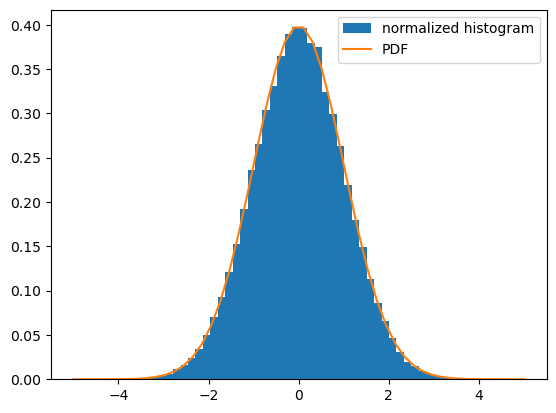

In [127]:
""" Standard normal distribution """
dist = norm(loc=0, scale=1)  
# Create a random variate sample
sample = dist.rvs(size=100000) 

x = np.linspace(-5, 5)
plt.hist(sample, bins=50, density=True, label='normalized histogram')  
plt.plot(x, dist.pdf(x), label='PDF')
plt.legend()

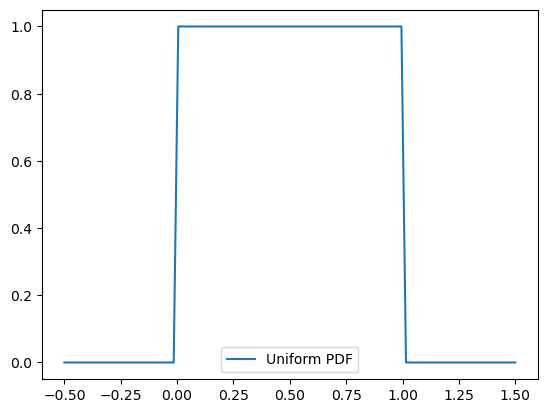

In [142]:
""" Uniform Distribution """
a = 0
b = 1
x = np.linspace(-0.5, 1.5, 100)
pdf_uniform = uniform.pdf(x, loc=a, scale=b-a)
plt.plot(x, pdf_uniform, label='Uniform PDF')
#plt.title('Uniform Distribution')
plt.legend()
plt.show()

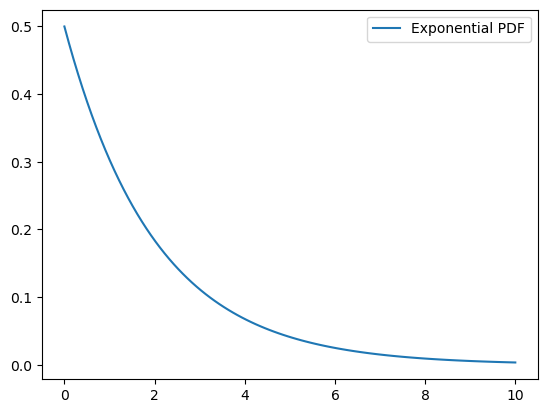

In [143]:
"""" Exponential Distribution """
lambda_param = 0.5
x = np.linspace(0, 10, 100)
pdf_expon = expon.pdf(x, scale=1/lambda_param)
plt.plot(x, pdf_expon, label='Exponential PDF')
plt.legend()
plt.show()

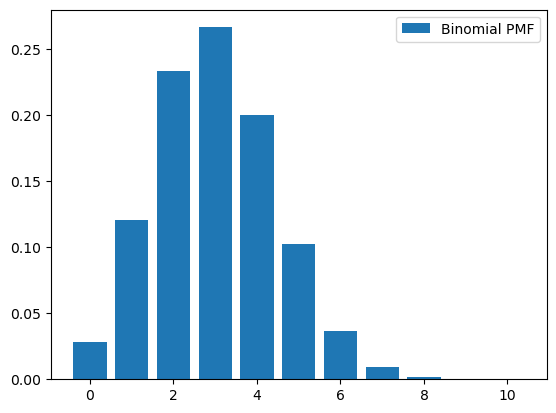

In [144]:
""" Binomial Distribution """
n = 10
p = 0.3
x = np.arange(0, n+1)
pmf_binom = binom.pmf(x, n, p)
plt.bar(x, pmf_binom, label='Binomial PMF')
plt.legend()
plt.show()

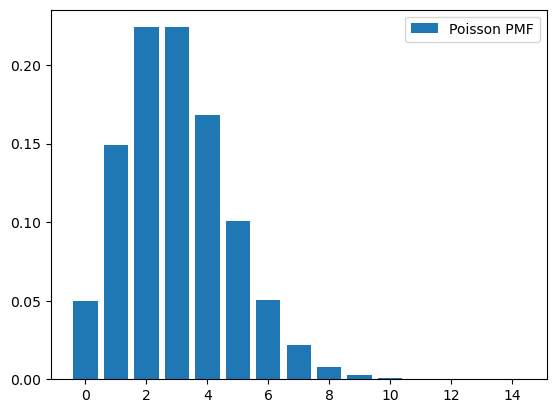

In [145]:
""" Poisson Distribution """
lambda_param = 3
x = np.arange(0, 15)
pmf_poisson = poisson.pmf(x, lambda_param)
plt.bar(x, pmf_poisson, label='Poisson PMF')
plt.legend()
plt.show()

In [18]:
""" Calculate the cumulative sum of the elements in an array. Starting with the first element, add the next element to the previous cumulative sum.
Better use numpy.cumsum, since scipy.cumsum is deprecated. """
data = np.array([1, 2, 3, 4, 5])
cumulative_sum2 = np.cumsum(data)
cumulative_sum2

array([ 1,  3,  6, 10, 15])

<h3 style="color:#D68910"> => Interpolation </h3>

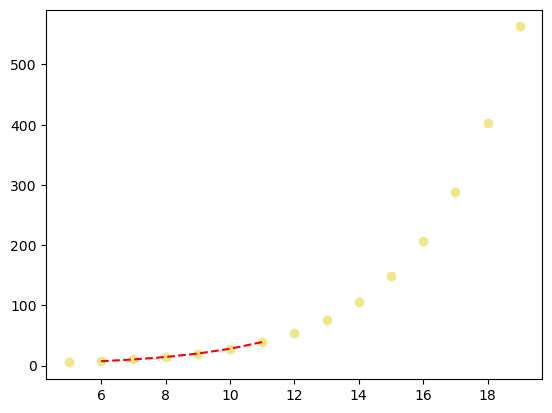

In [134]:
""" Univariate interpolation """
x = np.arange(5, 20)
y = np.exp(x/3.0)
f = interp1d(x, y)
x1 = np.arange(6, 12)
y1 = f(x1)

#plt.plot(x, y, 'o', x1, y1, '--') #separate to explicitly change  the color
plt.plot(x, y, 'o', color='khaki', label='Original Data')
plt.plot(x1, y1, '--', color='red', label='Interpolated Data')
plt.show()

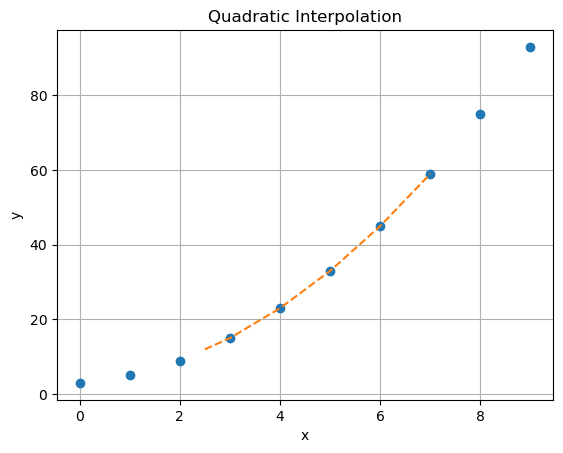

In [136]:
""" Quadratic Interpolation """
x = np.arange(0, 10)
y = x**2 + x + 3
f = interp1d(x, y)

x1 = np.arange(2.5, 7.5, 0.5) 
y1 = f(x1)

plt.plot(x, y, 'o', x1, y1, '--') 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Interpolation')
plt.grid()
plt.show()

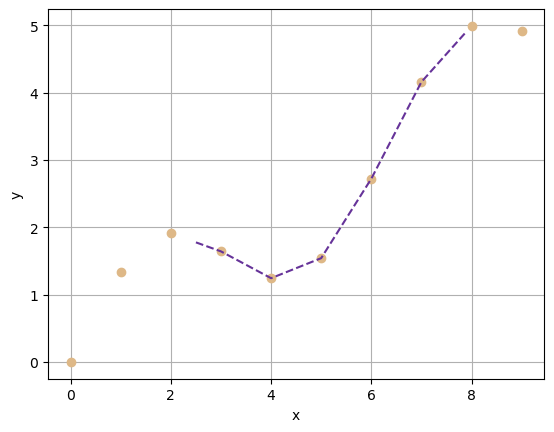

In [139]:
""" Sine interpolation """
x = np.arange(0, 10)
y = np.sin(x) + 0.5*x
f = interp1d(x, y)

x1 = np.arange(2.5, 8, 0.1)
y1 = f(x1) 

#plt.plot(x, y, 'o', x1, y1, '-')
plt.plot(x, y, 'o', color='burlywood', label='Original Data')
plt.plot(x1, y1, '--', color='rebeccapurple', label='Interpolated Data')
plt.xlabel('x') 
plt.ylabel('y')
plt.grid();

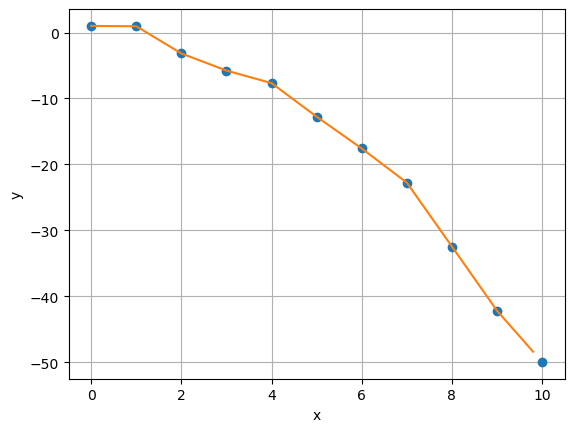

In [68]:
""" Increase the upper limit to include 9.9
To make sure that x1 is inside the range of values used for interpolation in the interp1d function.
"""
x = np.arange(0, 10.1)  
y = np.cos(x) + np.sin(2 * x) - 0.5 * x ** 2
f = interp1d(x, y)

x1 = np.arange(0, 9.9, 0.1)
y1 = f(x1)

plt.plot(x, y, 'o', x1, y1, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

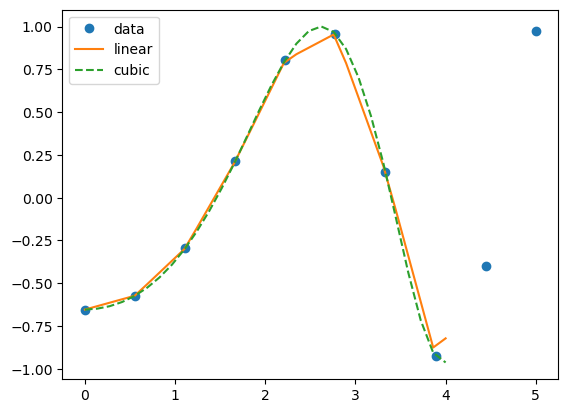

In [21]:
x = np.linspace(0, 5, 10)  
y = np.cos(x**2/3+4)  
## Chosse 2 different orders of the spline interpolator
fun1 = interp1d(x, y,kind = 'linear')  
fun2 = interp1d(x, y, kind = 'cubic')  
xnew = np.linspace(0, 4,30)  
plt.plot(x, y, 'o', xnew, fun1(xnew), '-', xnew, fun2(xnew), '--')  
plt.legend(['data', 'linear', 'cubic','nearest'], loc = 'best')  
plt.show()  

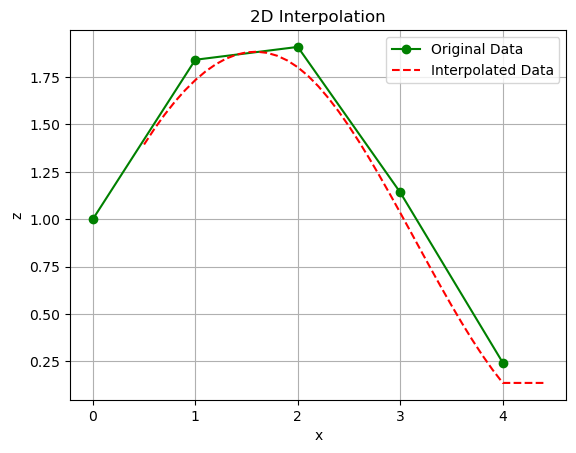

In [74]:
""" Multivariate interpolation => sin(x) + cos(y) function. 

scipy interpolate interp2d is deprecated:
Compatible replacements are RectBivariateSpline on regular grids, and bisplrep/bisplev for scattered 2D data.
"""
x = np.arange(0, 5)
y = np.arange(0, 5)
x1, y1 = np.meshgrid(x, y)
z = np.sin(x1) + np.cos(y1)  

# f = interpolate.interp2d(x, y, z, kind='cubic') #replaced 
f = RectBivariateSpline(x, y, z)

x2 = np.arange(0.5, 4.5, 0.1)
y2 = np.arange(0.5, 4.5, 0.1)
z2 = f(x2, y2)

plt.plot(x, z[0, :], 'go-', x2, z2[0, :], 'r--')
plt.xlabel('x')
plt.ylabel('z')
plt.title('2D Interpolation')
plt.legend(['Original Data', 'Interpolated Data'])
plt.grid(True)
plt.show()

[ 2.          1.88203018  2.68587106  4.14814815  6.00548697  8.00548697
 10.14814815 12.68587106 15.88203018 20.        ]


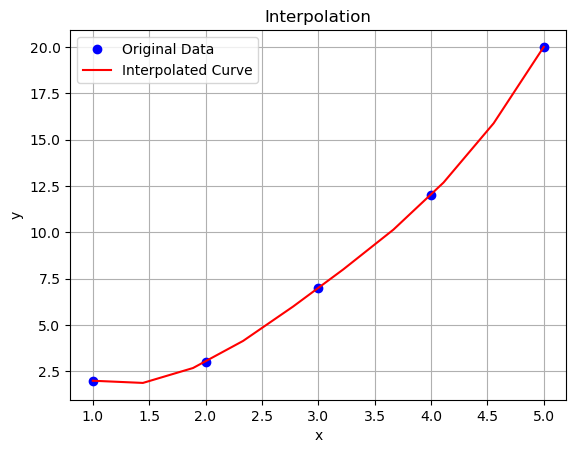

In [75]:
""" Interpolate between a set of (x,y) data points, with cubic spline interpolation.
tck is a tuple containing the knots, coefficients, and degree of the spline.
splev(new_x, tck) evaluate the spline at the new x values.
"""
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 7, 12, 20])

tck = splrep(x, y)
new_x = np.linspace(1, 5, 10)
interpolated_y = splev(new_x, tck)
print(interpolated_y)

# Display
plt.plot(x, y, 'bo', label='Original Data')
plt.plot(new_x, interpolated_y, 'r-', label='Interpolated Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
""" Create a 3rd degree polynomial from a coefficient array. """
coefficients = np.array([1, -5, 6])
polynomial = poly1d(coefficients)
polynomial

poly1d([ 1, -5,  6])

Sine function coefficients: [0.60826303 0.66205752]
Covariance of coefficients: [[ 1.33793356 -0.00301179]
 [-0.00301179  0.02273755]]


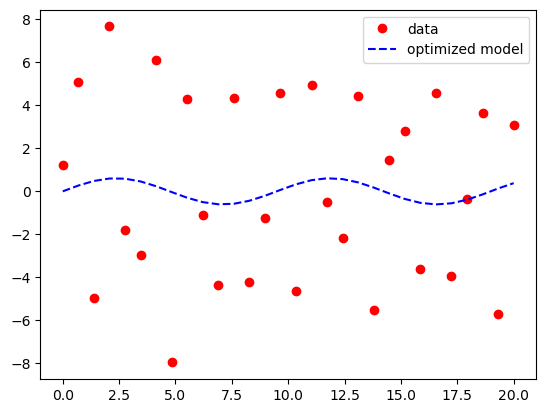

In [48]:
x = np.linspace(0, 20, num=30)
# Create y data with sine function + noise
y = 5.5 * np.sin(3.5 * x) + np.random.normal(size=30)

def f_test(x, a, b):
  return a * np.sin(b * x)

# Perform curve fit between x and y data
param, param_cov = curve_fit(f_test, x, y)

print(f"Sine function coefficients: {param}")
print(f"Covariance of coefficients: {param_cov}") 

# Generate model prediction with optmized params
y_fit = param[0] * np.sin(param[1] * x)

# Display data and model fit
plt.plot(x, y, 'o', color='red', label="data")
plt.plot(x, y_fit, '--', color='blue', label="optimized model")
plt.legend()
plt.show()

<h3 style="color:#D68910"> => Integration </h3>

In [128]:
""" Evaluate the integral of a function. Calculating ∫ f(x) dx from a to b 
(a and b are the lower and upper bounds)
"""
func = lambda x: x**2 + 2*x + 3
result, error = quad(func, 0, 5)
result, error

(81.66666666666666, 9.066821367772111e-13)

<h3 style="color:#D68910"> Recap: </h3>
<div style="margin-top: -10px;">

Lotka-Volterra equations => a pair of coupled first-order nonlinear differential equations that model the dynamics of a predator-prey system.     

The equations are given by:   

$ dx/dt = \alpha * x - \beta * x * y $      
$ dy/dt = \delta * x * y - \gamma * y $     

Where:      
x => population of the prey     
y => population of the predator      
alpha, beta, delta, and gamma are parameters that control the growth and interaction rates of the populations.      

'odeint' can be used to solve the differential equations.    
</div>

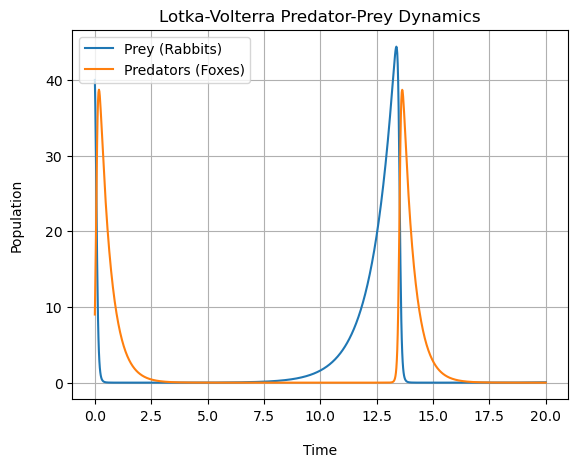

In [35]:
def lotka_volterra(y, t, alpha, beta, delta, gamma):
    """ Calculate the Lotka-Volterra equations. """
    x, y = y
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Parameters for the Lotka-Volterra equations
alpha, beta, delta, gamma = 1.0, 0.5, 0.5, 2.0
# Initial populations of prey and predators
x0, y0 = 40, 9

# Time points to simulate over
t = np.linspace(0, 20, 1000)

# Solving the differential equations using odeint
y = odeint(lotka_volterra, [x0, y0], t, args=(alpha, beta, delta, gamma))

# Extract populations of prey and predators from the solution
prey_population = y[:, 0]
predator_population = y[:, 1]

# Plot
plt.plot(t, prey_population, label="Prey (Rabbits)")
plt.plot(t, predator_population, label="Predators (Foxes)")
plt.xlabel("Time", labelpad=15)  # Adjust the labelpad value to add space))
plt.ylabel("Population", labelpad=15)
plt.title("Lotka-Volterra Predator-Prey Dynamics")
plt.legend()
plt.grid(True)
# Get the y-axis object
y_axis = plt.gca().yaxis
# Set the position of the y-label to add space between y-label and y-axis
y_label_pos = y_axis.get_label().get_position()
y_axis.get_label().set_position((y_label_pos[0] - 2.10, y_label_pos[1]))

#plt.show()